In [158]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import geopandas as gpd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inequality-in-income-across-the-globe/Inequality in Income.csv


# ****Data Loading

In [159]:
df=pd.read_csv('/kaggle/input/inequality-in-income-across-the-globe/Inequality in Income.csv')
df.head(10)

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in income (2010),Inequality in income (2011),Inequality in income (2012),Inequality in income (2013),Inequality in income (2014),Inequality in income (2015),Inequality in income (2016),Inequality in income (2017),Inequality in income (2018),Inequality in income (2019),Inequality in income (2020),Inequality in income (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,10.767000,10.767000,10.767000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,24.454000,28.945340,28.945340,28.945340,28.945340,28.945340,28.877330,28.877330,28.877330,28.877330,28.877330,28.877330
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,18.330960,18.330960,12.237393,12.237393,12.237393,12.237393,12.237393,12.237393,13.178980,13.178980,13.178980,13.178980
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARG,Argentina,America,Southern Hemisphere,Very High,LAC,47.0,28.898242,27.705847,26.457340,25.898772,26.390125,25.531354,26.977223,25.978698,26.405909,28.099767,28.099767,28.099767
6,ARM,Armenia,Asia,Northern Hemisphere,High,ECA,85.0,14.254360,14.254360,14.254360,14.254360,14.254360,14.254360,17.438370,17.438370,17.438370,17.438370,17.438370,17.438370
7,ATG,Antigua and Barbuda,America,Northern Hemisphere,High,LAC,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AUS,Australia,Oceania,Southern Hemisphere,Very High,NaN,5.0,17.700000,17.700000,17.700000,17.700000,17.296000,17.296000,17.134000,17.134000,17.126000,17.126000,17.126000,17.126000
9,AUT,Austria,Europe,Northern Hemisphere,Very High,NaN,25.0,12.696660,13.840980,15.499800,15.502530,14.165000,13.615980,14.775880,15.902240,13.394220,13.394220,14.932910,14.932910


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ISO3                         195 non-null    object 
 1   Country                      195 non-null    object 
 2   Continent                    195 non-null    object 
 3   Hemisphere                   195 non-null    object 
 4   Human Development Groups     191 non-null    object 
 5   UNDP Developing Regions      151 non-null    object 
 6   HDI Rank (2021)              191 non-null    float64
 7   Inequality in income (2010)  133 non-null    float64
 8   Inequality in income (2011)  142 non-null    float64
 9   Inequality in income (2012)  147 non-null    float64
 10  Inequality in income (2013)  153 non-null    float64
 11  Inequality in income (2014)  154 non-null    float64
 12  Inequality in income (2015)  153 non-null    float64
 13  Inequality in income

In [161]:
df.describe()

,HDI Rank (2021),Inequality in income (2010),Inequality in income (2011),Inequality in income (2012),Inequality in income (2013),Inequality in income (2014),Inequality in income (2015),Inequality in income (2016),Inequality in income (2017),Inequality in income (2018),Inequality in income (2019),Inequality in income (2020),Inequality in income (2021)
count,191.000000,133.000000,142.000000,147.000000,153.000000,154.000000,153.000000,154.000000,153.000000,156.000000,157.000000,160.000000,160.000000
mean,95.811518,24.315915,23.998923,24.059115,23.756587,23.631926,23.276751,23.437117,23.356497,23.156230,23.118396,22.808170,22.808170
std,55.307333,10.762789,10.596861,10.831429,10.212251,10.155927,9.806431,9.690513,9.738382,9.726570,9.702511,9.664903,9.664903
min,1.000000,5.845034,5.845034,5.845034,5.845034,5.845034,5.845034,8.524723,8.524723,8.524723,8.524723,8.305240,8.305240
25%,48.500000,17.325000,17.274975,16.873130,16.200680,16.191820,16.147120,16.337580,16.130000,16.445524,16.556550,16.529762,16.529762
50%,96.000000,22.600000,22.275770,22.407570,21.803230,21.347845,21.422730,22.169790,21.804750,21.526705,21.434030,20.913235,20.913235
75%,143.500000,30.728920,30.153738,30.125422,28.945340,29.245352,28.500000,28.477500,28.394540,28.303420,28.099767,28.062632,28.062632
max,191.000000,68.337000,68.337000,68.337000,56.013380,56.013380,56.124000,56.124000,56.996000,56.996000,56.996000,56.996000,56.996000


In [162]:
df.isnull().sum()

ISO3                            0
Country                         0
Continent                       0
Hemisphere                      0
Human Development Groups        4
UNDP Developing Regions        44
HDI Rank (2021)                 4
Inequality in income (2010)    62
Inequality in income (2011)    53
Inequality in income (2012)    48
Inequality in income (2013)    42
Inequality in income (2014)    41
Inequality in income (2015)    42
Inequality in income (2016)    41
Inequality in income (2017)    42
Inequality in income (2018)    39
Inequality in income (2019)    38
Inequality in income (2020)    35
Inequality in income (2021)    35
dtype: int64

In [163]:
df.fillna(0,inplace=True)

In [164]:
df.isnull().sum()

ISO3                           0
Country                        0
Continent                      0
Hemisphere                     0
Human Development Groups       0
UNDP Developing Regions        0
HDI Rank (2021)                0
Inequality in income (2010)    0
Inequality in income (2011)    0
Inequality in income (2012)    0
Inequality in income (2013)    0
Inequality in income (2014)    0
Inequality in income (2015)    0
Inequality in income (2016)    0
Inequality in income (2017)    0
Inequality in income (2018)    0
Inequality in income (2019)    0
Inequality in income (2020)    0
Inequality in income (2021)    0
dtype: int64

In [165]:
df.columns

Index(['ISO3', 'Country', 'Continent', 'Hemisphere',
       'Human Development Groups', 'UNDP Developing Regions',
       'HDI Rank (2021)', 'Inequality in income (2010)',
       'Inequality in income (2011)', 'Inequality in income (2012)',
       'Inequality in income (2013)', 'Inequality in income (2014)',
       'Inequality in income (2015)', 'Inequality in income (2016)',
       'Inequality in income (2017)', 'Inequality in income (2018)',
       'Inequality in income (2019)', 'Inequality in income (2020)',
       'Inequality in income (2021)'],
      dtype='object')

In [166]:
#pd.get_dummies(df)

In [167]:
numeric_df = df.select_dtypes(include=['float64'])
corel = numeric_df.corr()

In [168]:
corel

,HDI Rank (2021),Inequality in income (2010),Inequality in income (2011),Inequality in income (2012),Inequality in income (2013),Inequality in income (2014),Inequality in income (2015),Inequality in income (2016),Inequality in income (2017),Inequality in income (2018),Inequality in income (2019),Inequality in income (2020),Inequality in income (2021)
HDI Rank (2021),1.000000,0.297301,0.270824,0.325192,0.319211,0.317193,0.312745,0.303455,0.316472,0.323867,0.331422,0.356144,0.356144
Inequality in income (2010),0.297301,1.000000,0.846347,0.719022,0.667614,0.649244,0.596143,0.548665,0.547021,0.555181,0.540524,0.546282,0.546282
Inequality in income (2011),0.270824,0.846347,1.000000,0.865428,0.791255,0.760861,0.710096,0.662227,0.622832,0.642613,0.632752,0.640176,0.640176
Inequality in income (2012),0.325192,0.719022,0.865428,1.000000,0.929938,0.901814,0.855942,0.788375,0.752896,0.772667,0.763772,0.773356,0.773356
Inequality in income (2013),0.319211,0.667614,0.791255,0.929938,1.000000,0.970830,0.923609,0.851814,0.817839,0.833812,0.820784,0.825000,0.825000
Inequality in income (2014),0.317193,0.649244,0.760861,0.901814,0.970830,1.000000,0.952280,0.879517,0.845747,0.862928,0.854522,0.858497,0.858497
Inequality in income (2015),0.312745,0.596143,0.710096,0.855942,0.923609,0.952280,1.000000,0.926339,0.891289,0.910251,0.901695,0.906507,0.906507
Inequality in income (2016),0.303455,0.548665,0.662227,0.788375,0.851814,0.879517,0.926339,1.000000,0.964978,0.930144,0.920990,0.908551,0.908551
Inequality in income (2017),0.316472,0.547021,0.622832,0.752896,0.817839,0.845747,0.891289,0.964978,1.000000,0.947662,0.938953,0.913244,0.913244
Inequality in income (2018),0.323867,0.555181,0.642613,0.772667,0.833812,0.862928,0.910251,0.930144,0.947662,1.000000,0.991528,0.966778,0.966778


# ****Exploratory Data Analysis

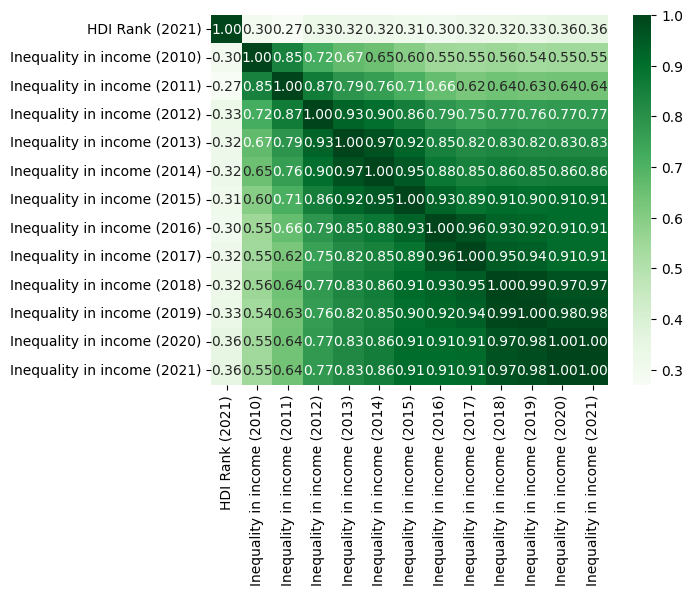

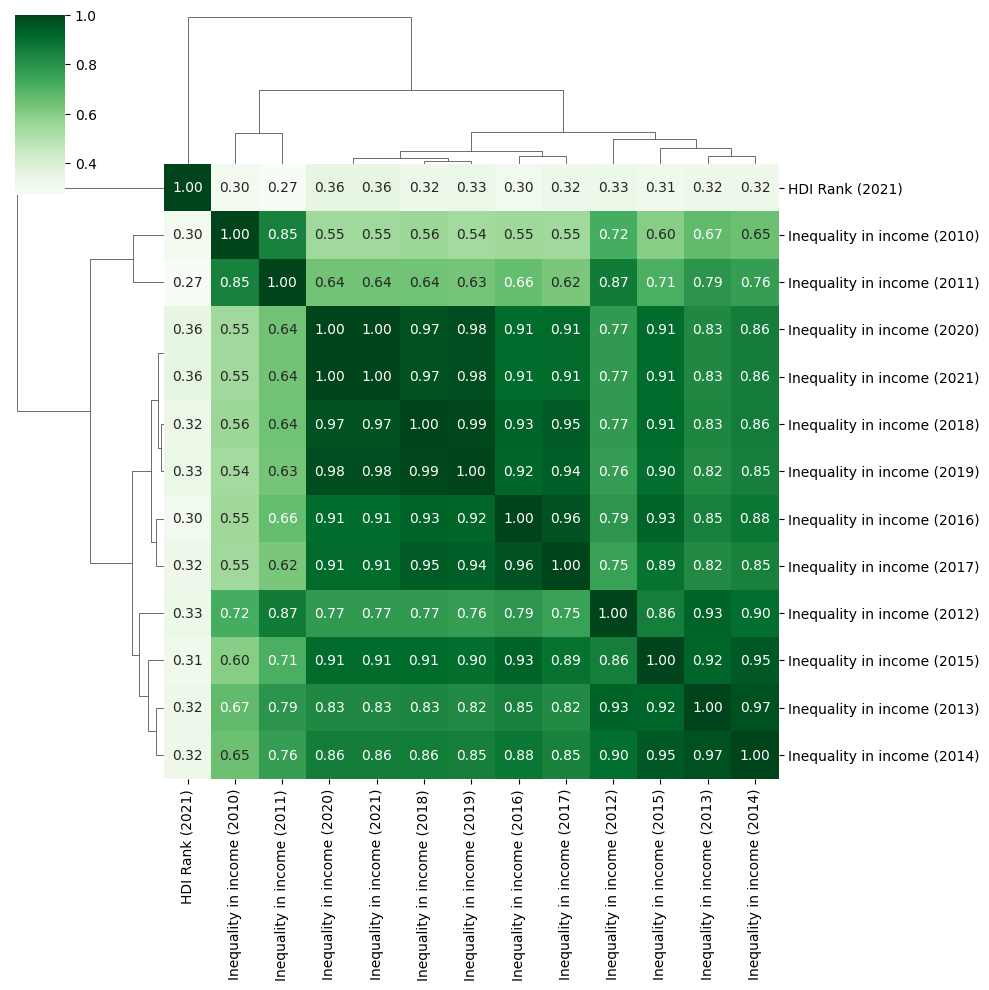

In [169]:
sns.heatmap(corel,annot=True,cmap='Greens',fmt='.2f')
plt.show()

sns.clustermap(corel,annot=True,cmap='Greens',fmt='.2f')
plt.show()

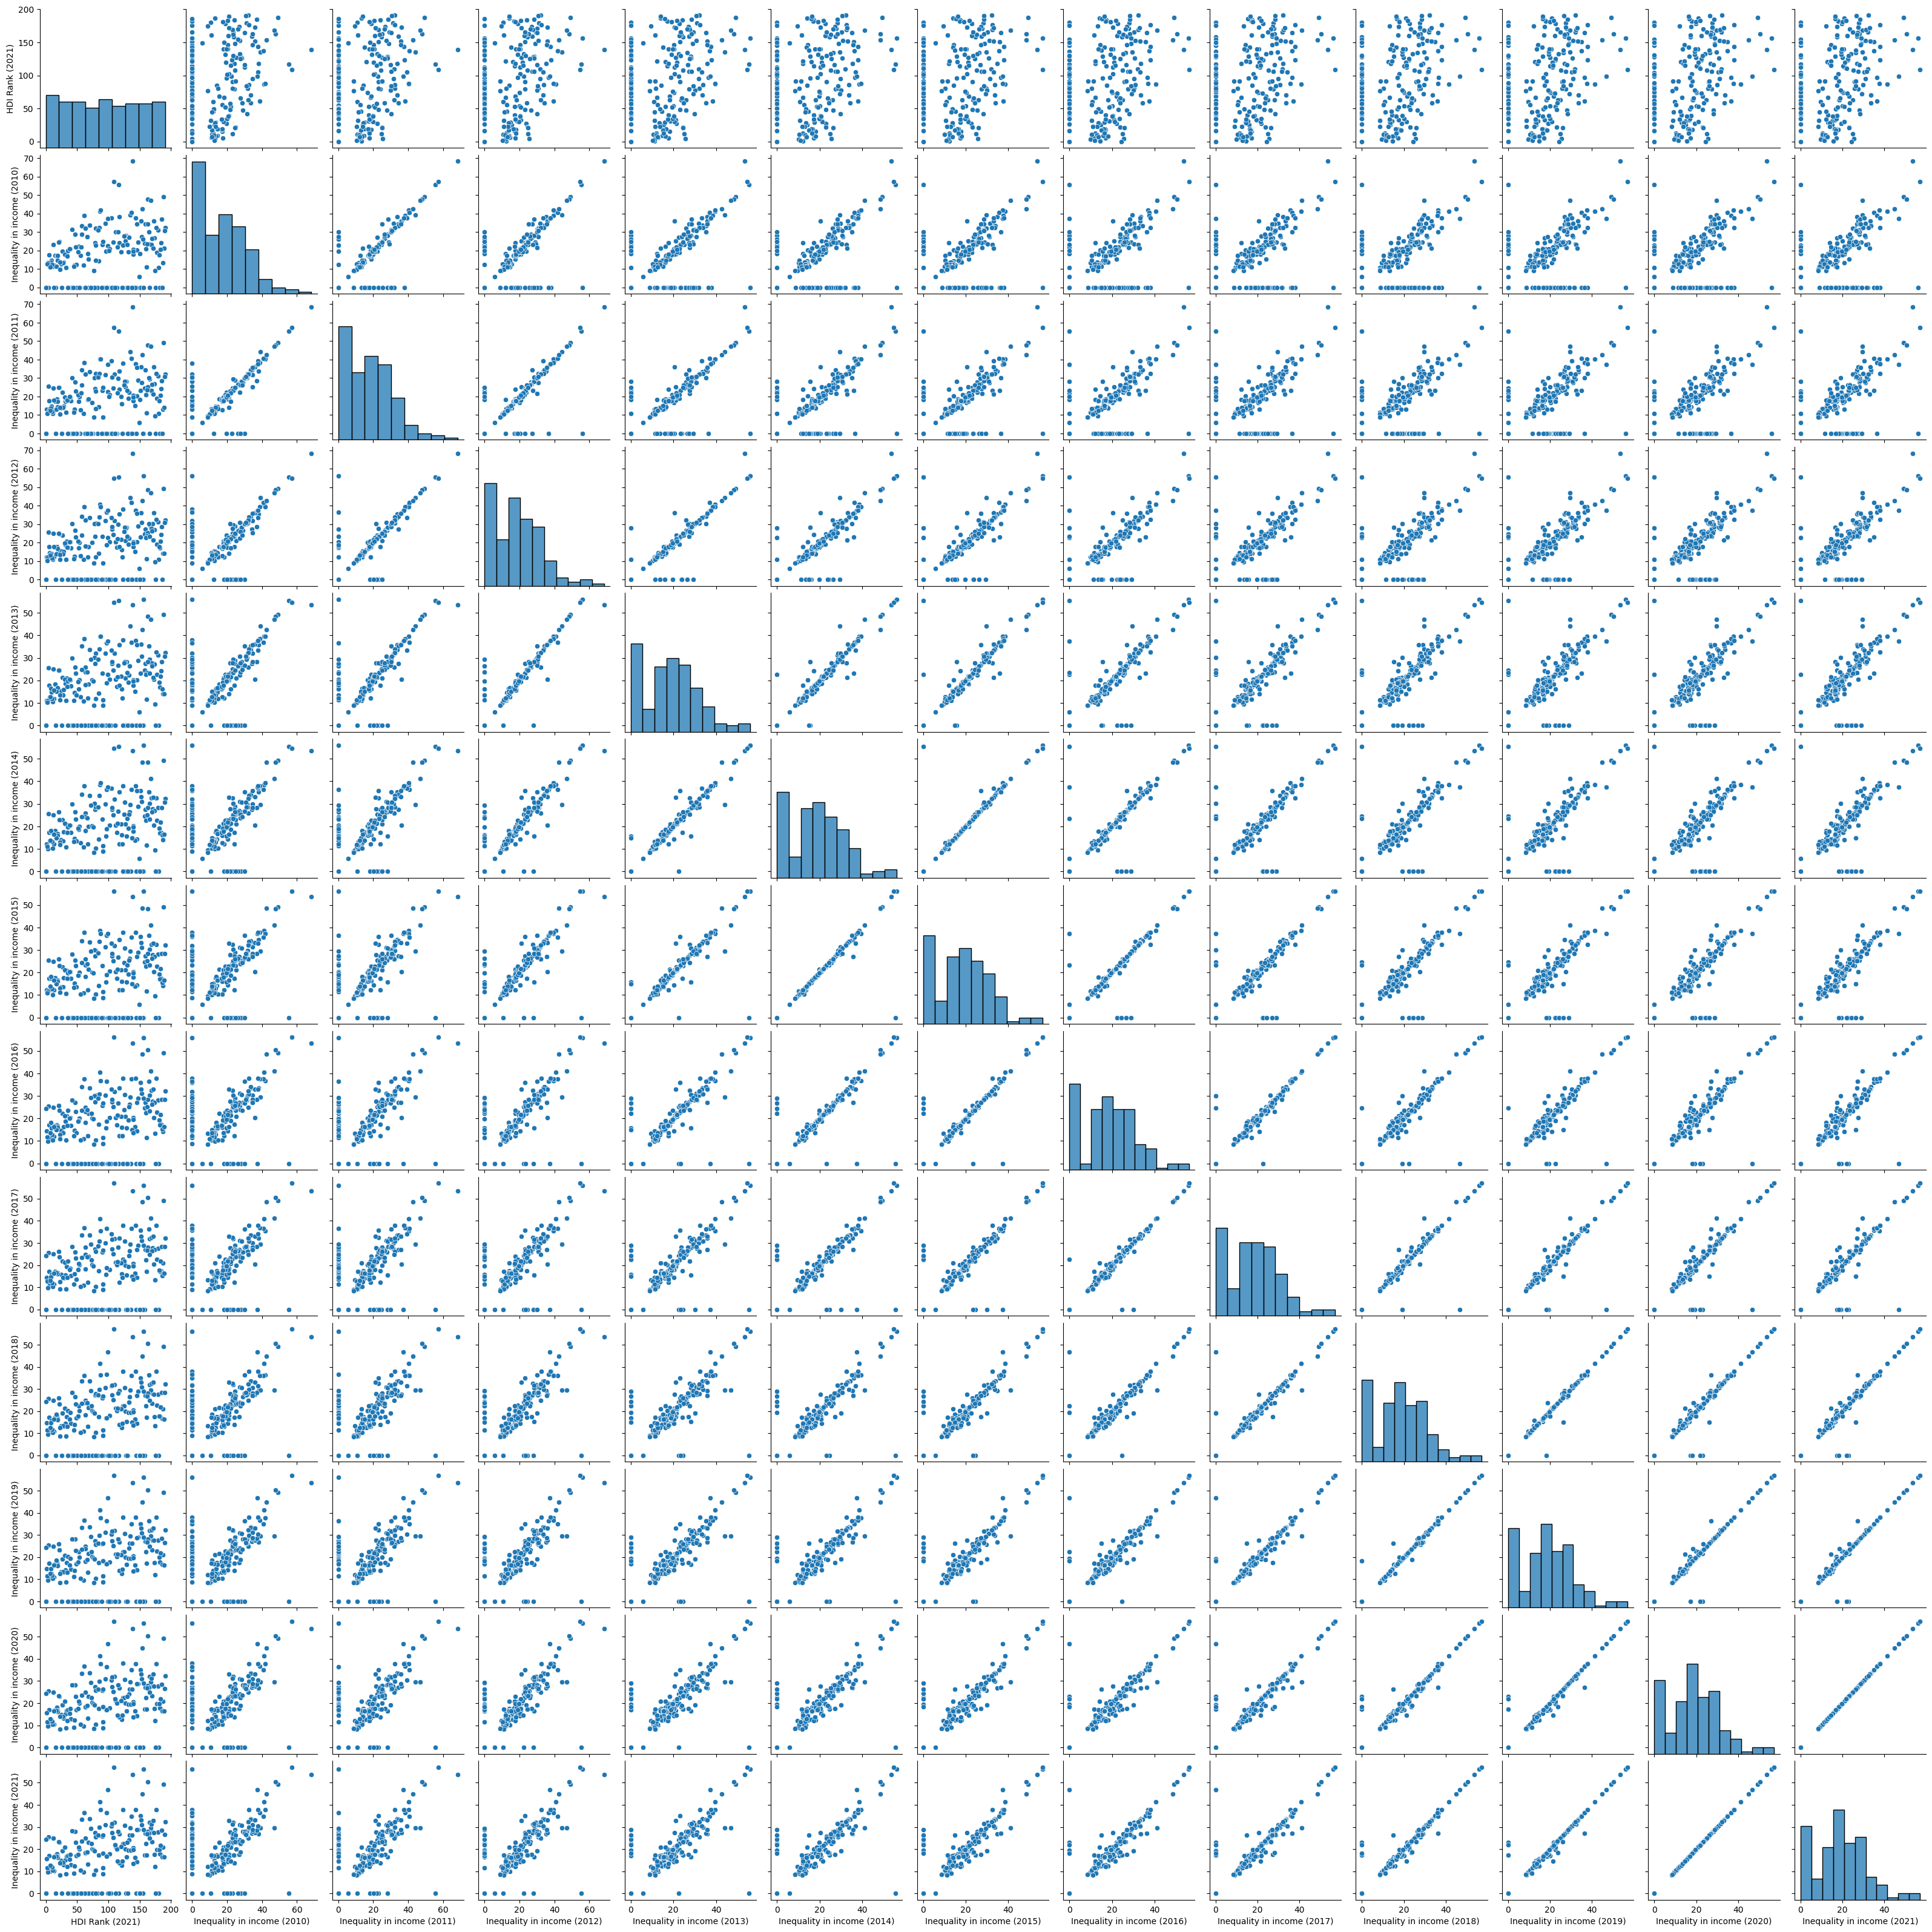

In [170]:
sns.pairplot(df)
plt.show()

# Continent

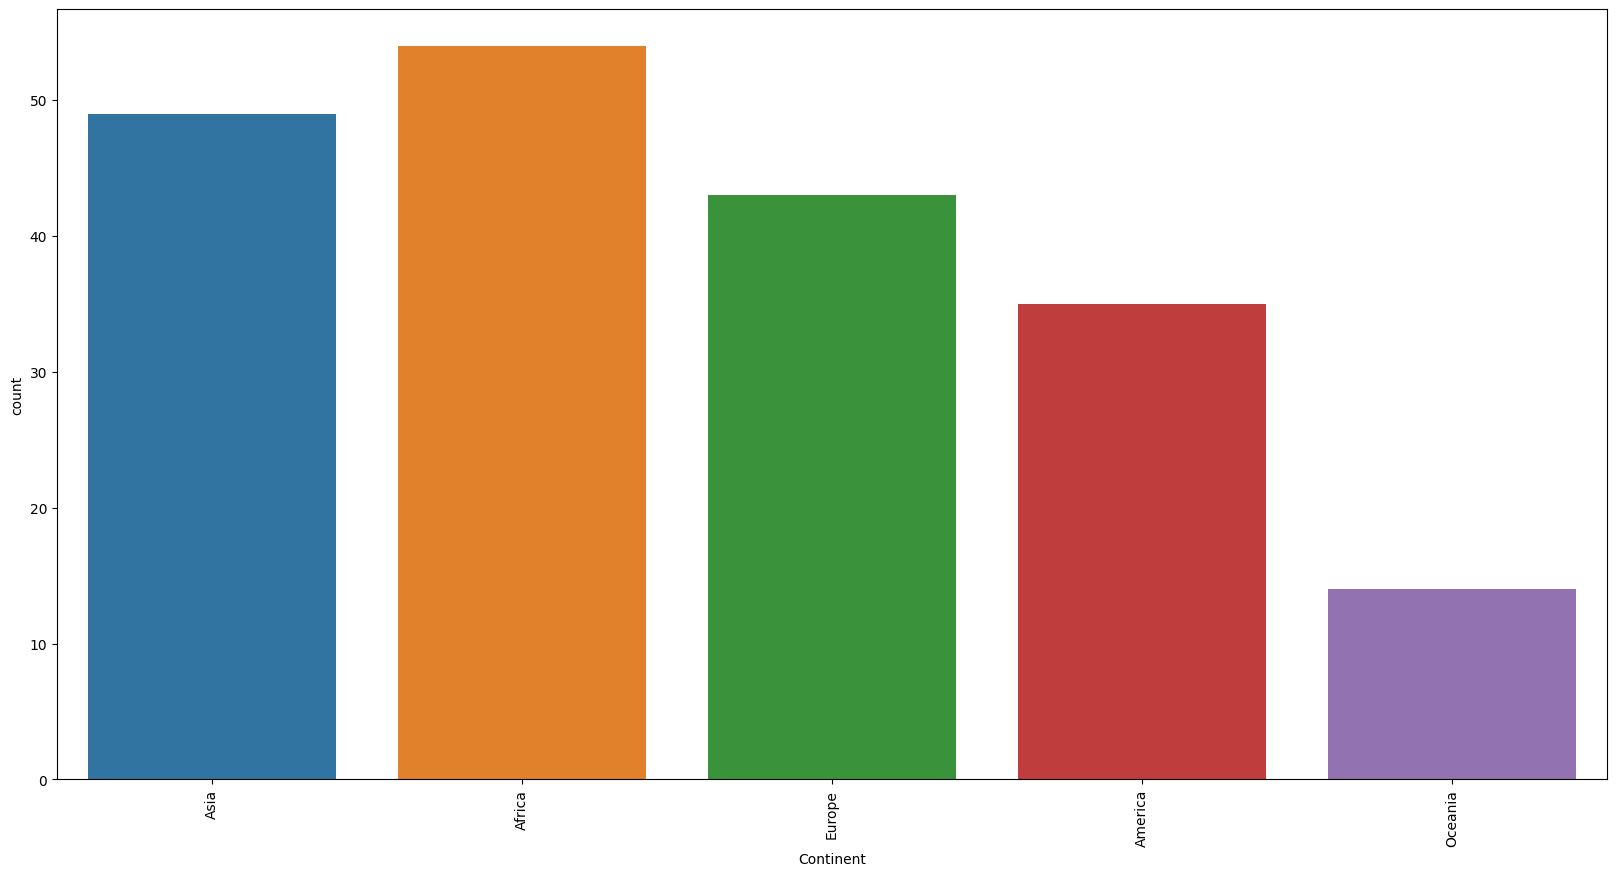

In [171]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Continent')
plt.xticks(rotation=90)
plt.show()

# Human Development Groups

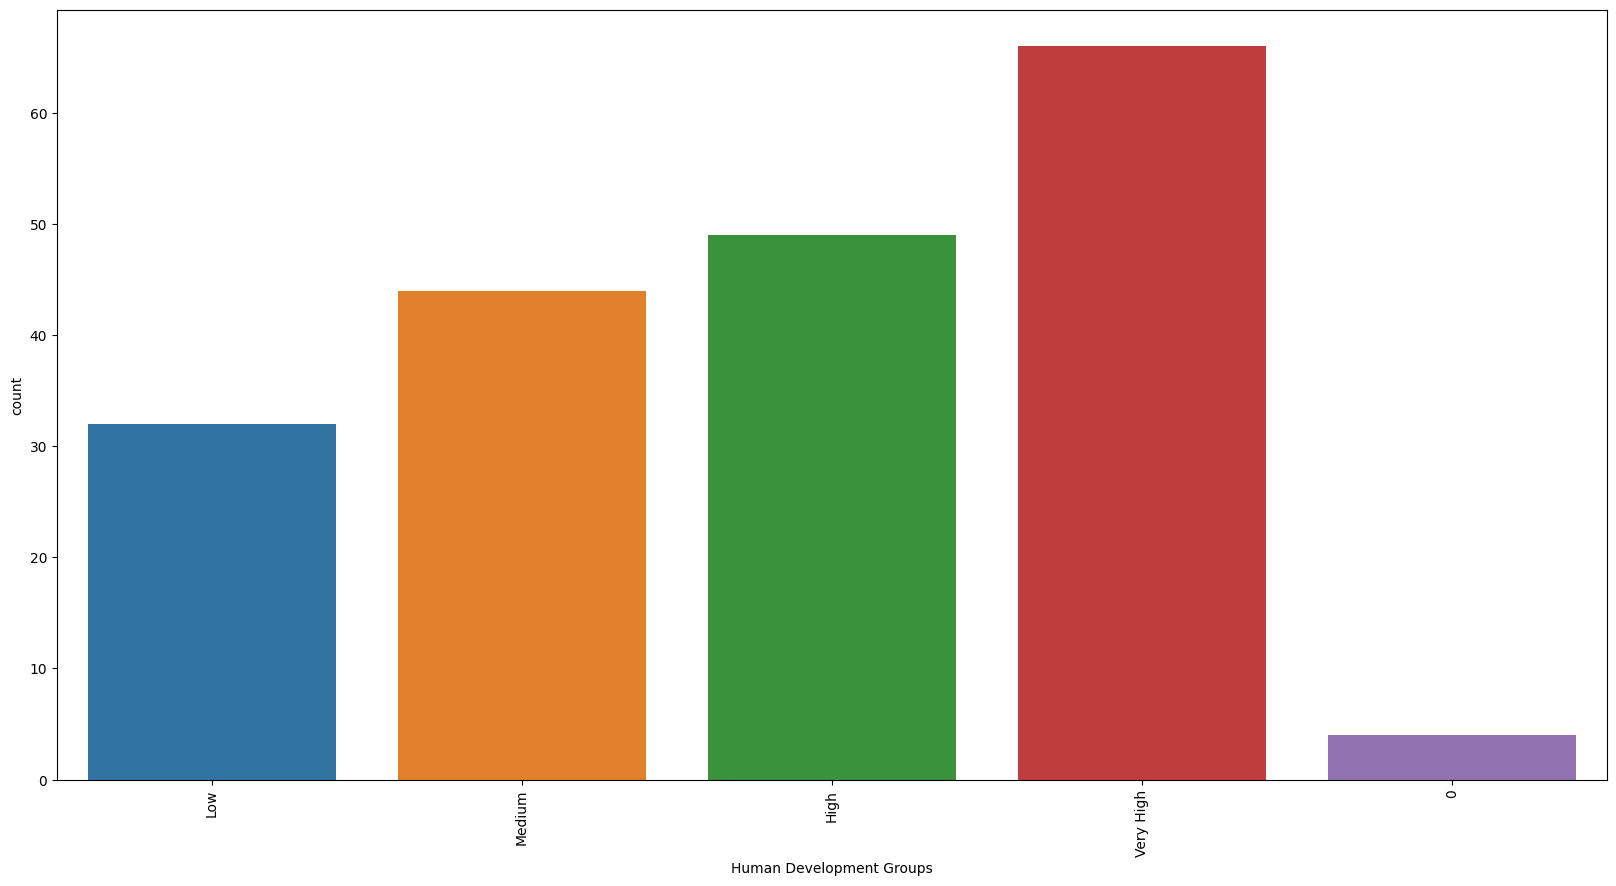

In [172]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Human Development Groups')
plt.xticks(rotation=90)
plt.show()

# Histogram for HDI Rank (2021)

In [173]:
fig = px.histogram(df, x='HDI Rank (2021)', title='Distribution of HDI Rank (2021)')
fig.show()

#  Inequality in income (2021)

In [174]:
fig = px.box(df, y='Inequality in income (2021)', title='Box Plot of Inequality in income (2021)')
fig.show()

# Continent counts

In [175]:
continent_counts = df['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Count']

fig = px.bar(continent_counts, x='Continent', y='Count', title='Count of Countries by Continent')
fig.show()

# HDI Rank (2021) vs. Inequality in income (2021)

In [176]:
fig = px.scatter(df, x='HDI Rank (2021)', y='Inequality in income (2021)', title='Scatter Plot: HDI Rank (2021) vs. Inequality in income (2021)')
fig.show()

# Hemisphere distribution

In [177]:
hemisphere_counts = df['Hemisphere'].value_counts().reset_index()
hemisphere_counts.columns = ['Hemisphere', 'Count']

fig = px.pie(hemisphere_counts, names='Hemisphere', values='Count', title='Hemisphere Distribution')
fig.show()


# Trends in Inequality in income (2010-2021)

In [178]:
years = df.columns[8:]

# Calculate the mean for each year
mean_values = df[years].mean()

# Create a DataFrame with years and mean values
mean_df = pd.DataFrame({'Year': years, 'Mean Inequality in income': mean_values})

# Create a line plot
fig = px.line(mean_df, x='Year', y='Mean Inequality in income', title='Trends in Mean Inequality in income (2010-2021)')
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Mean Inequality in income')
fig.show()


# Inequality in income (2021)

In [179]:
fig = px.box(df, x='Continent', y='Inequality in income (2021)', title='Box Plots of Inequality in income (2021) by Continent')
fig.update_xaxes(title='Continent')
fig.update_yaxes(title='Inequality in income (2021)')
fig.show()


# Human Development Group

In [180]:
group_counts = df['Human Development Groups'].value_counts().reset_index()
group_counts.columns = ['Human Development Group', 'Count']

fig = px.bar(group_counts, x='Human Development Group', y='Count', title='Number of Countries in Each Human Development Group')
fig.update_xaxes(title='Human Development Group')
fig.update_yaxes(title='Count')
fig.show()


# Choropleth Map of HDI Rank (2021)

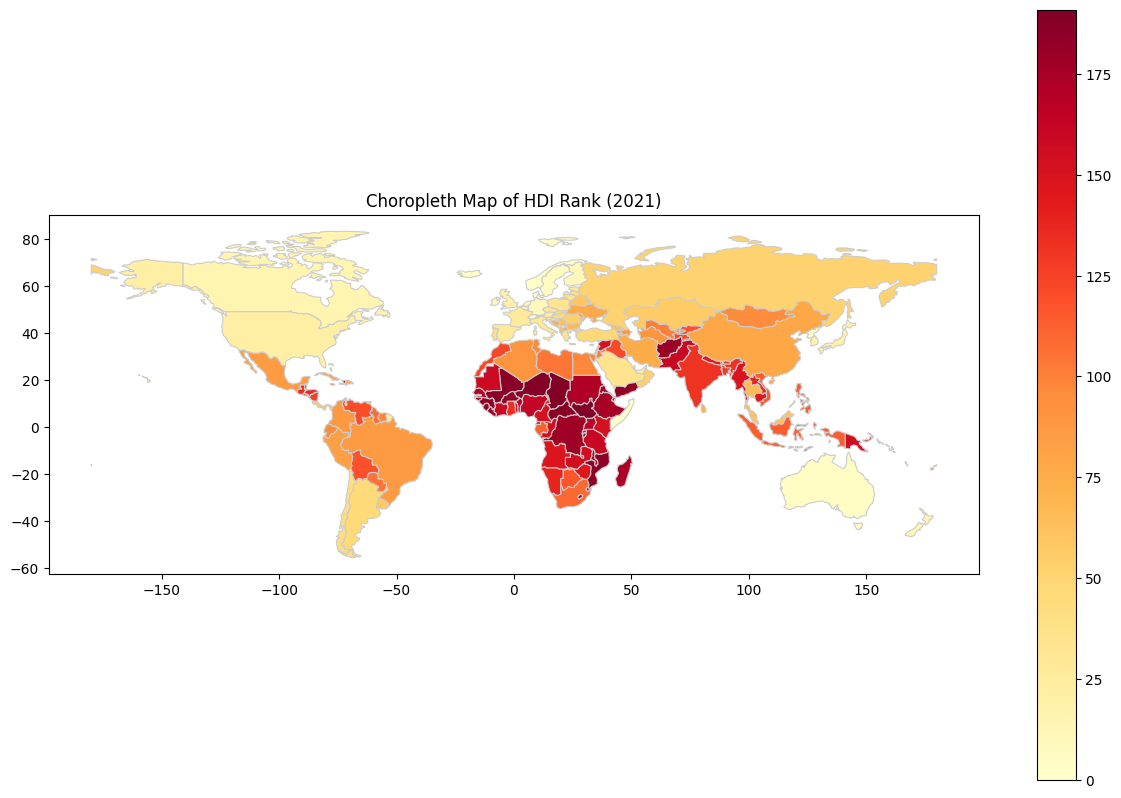

In [181]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.set_index('iso_a3').join(df.set_index('ISO3'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='HDI Rank (2021)', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Choropleth Map of HDI Rank (2021)')
plt.show()


# Country Locations on the Map

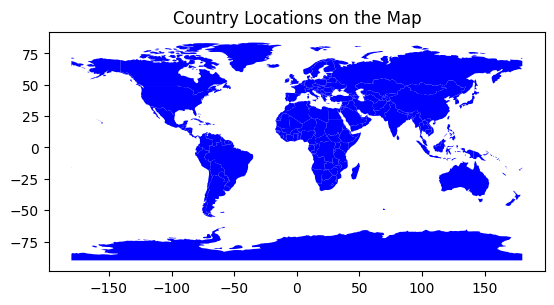

In [182]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

countries = gpd.GeoDataFrame(world[['name', 'geometry']], geometry='geometry')
countries.plot(markersize=5, color='blue', ax=plt.gca())
plt.title('Country Locations on the Map')
plt.show()


# Bubble Map of HDI Rank (2021) with Bubble Size based on Inequality in income (2021)

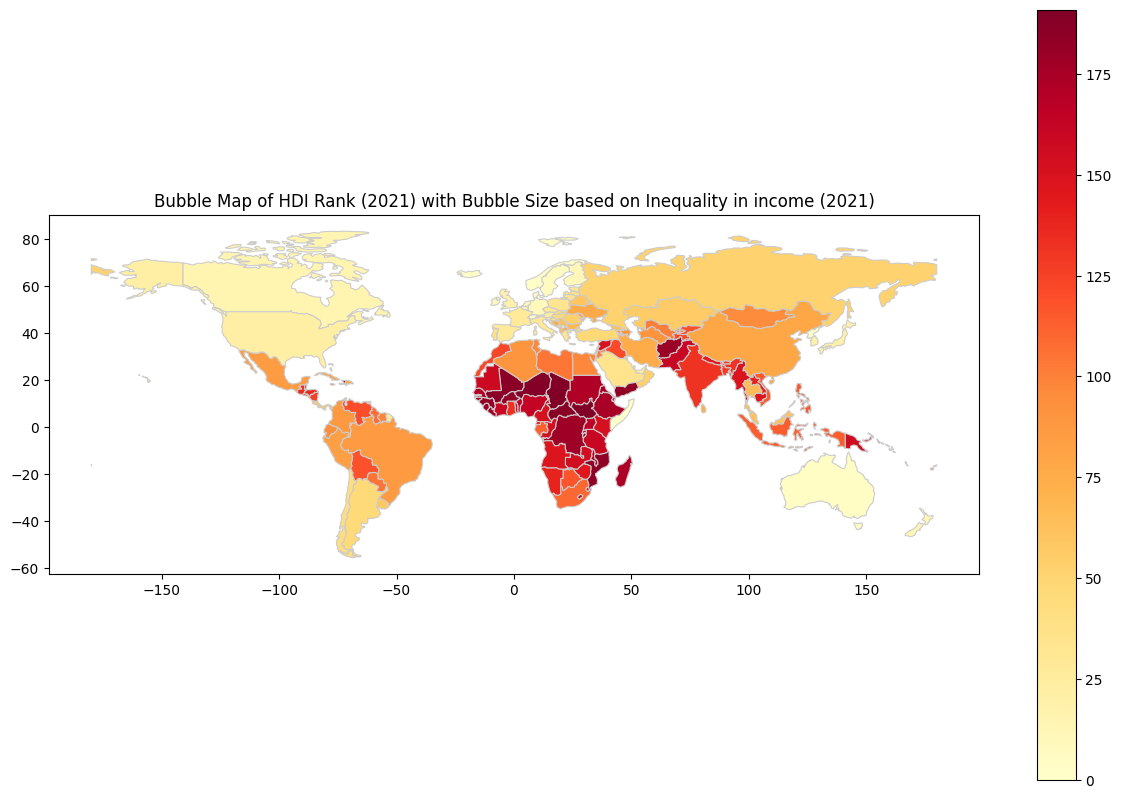

In [183]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.set_index('iso_a3').join(df.set_index('ISO3'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='HDI Rank (2021)', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, markersize=merged_data['Inequality in income (2021)']*5)
plt.title('Bubble Map of HDI Rank (2021) with Bubble Size based on Inequality in income (2021)')
plt.show()

# Spatial Distribution Map

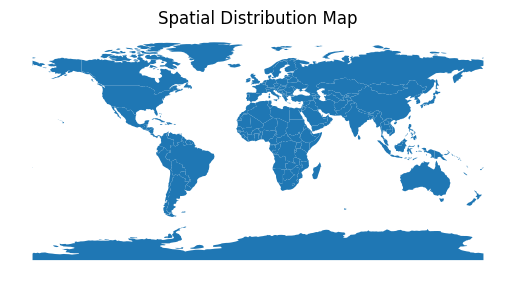

In [184]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot()
plt.title('Spatial Distribution Map')
plt.axis('off') 
plt.show()


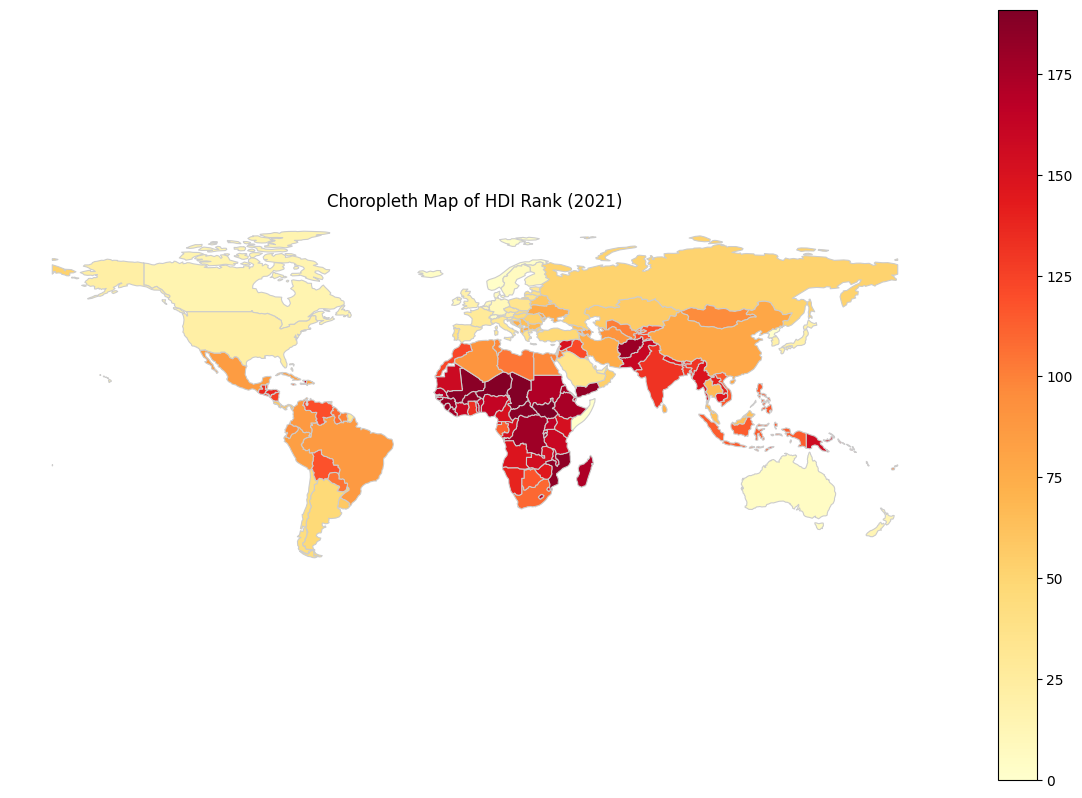

In [186]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.set_index('iso_a3').join(df.set_index('ISO3'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='HDI Rank (2021)', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Choropleth Map of HDI Rank (2021)')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


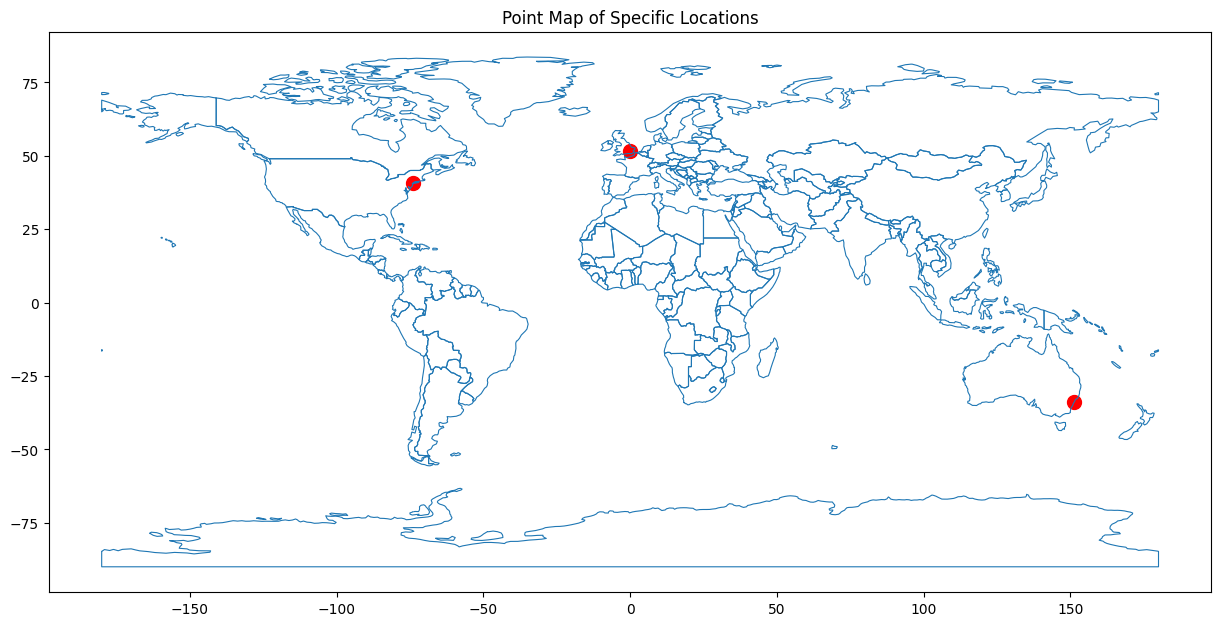

In [188]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define the latitude and longitude coordinates for your cities
latitude_A = 40.7128  # Latitude of City A
longitude_A = -74.0060  # Longitude of City A

latitude_B = 51.5074  # Latitude of City B
longitude_B = -0.1278  # Longitude of City B

latitude_C = -33.8688  # Latitude of City C
longitude_C = 151.2093  # Longitude of City C

# Create a GeoDataFrame with point geometries for specific locations
points_data = gpd.GeoDataFrame({'City': ['City A', 'City B', 'City C'],
                                'Latitude': [latitude_A, latitude_B, latitude_C],
                                'Longitude': [longitude_A, longitude_B, longitude_C]},
                               geometry=gpd.points_from_xy([longitude_A, longitude_B, longitude_C],
                                                           [latitude_A, latitude_B, latitude_C]))

# Plot the world map and overlay points
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.8)
points_data.plot(ax=ax, color='red', markersize=100)
plt.title('Point Map of Specific Locations')
plt.show()
